# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Antoine Verier

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [3]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

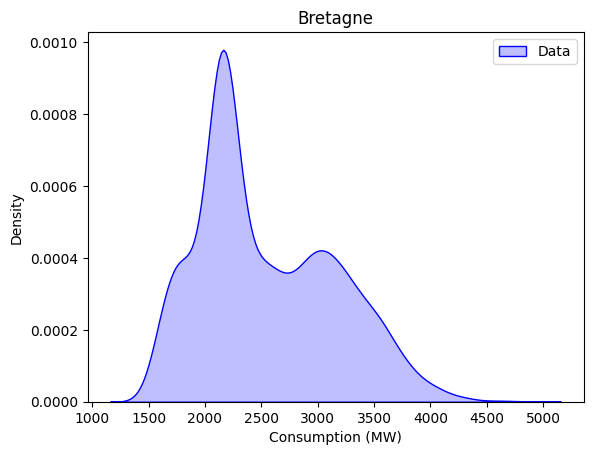

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

On calcule l'espérance de l'estimateur pour la moyenne :

$\mathbb{E}[\hat{\mu}] = \mathbb{E}[\frac{1}{n}\sum_{i=1}^{n} x_i]$ $=$ $\frac{1}{n}$ $\sum_{i=1}^{n} \mathbb{E}[x_i]$

$\mathbb{E}[\hat{\mu}] = \mu$

$\mathbb{E}[\hat{\sigma^2}] = \mathbb{E}[\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2] = \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}[(x_i - \hat \mu)^2]  $

$\mathbb{E}[\hat{\sigma^2}] = \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}[x_i^2 -2x_i \hat{\mu} + \hat{\mu}^2] = \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}[x_i^2] -2\mathbb{E}[x_i\hat{\mu}] + \mathbb{E}[\hat{\mu}^2]$

or : 

$ \mathbb{E}[x_i^2] = \mathbb{V}[x_i] + \mathbb{E}[x_i]^2 = \sigma^2 + \mu^2 $

$ \mathbb{E}[\hat{\mu}^2] = \mathbb{V}[\hat{\mu}] + \mathbb{E}[\hat{\mu}]^2 = \frac{\sigma^2}{n} + \mu^2$

$ \mathbb{E}[x_i \hat{\mu}] = \mathbb{E}[x_i\frac{1}{n} \sum_{l=1}x_l] = \frac{\mathbb{E}[x_i]}{n} \mathbb{E}[\sum_{l=1, l ≠ i}^n x_l] + \frac{\mathbb{E}[x_i^2]}{n} = \frac{\mu(n-1)\mu}{n} + \frac{1}{n}(\sigma^2 + \mu^2) = \frac{1}{n} \sigma^2 + \mu^2$

$\mathbb{E}[\hat{\sigma^2}] = \frac 1 {n-1} \sum_{i=1}^n (\sigma^2 + \mu^2 - \frac{2}{n}\sigma^2 - 2\mu^2 + \frac{\sigma^2}{n}+\mu^2) $ 

$\mathbb{E}[\hat{\sigma^2}] = \frac 1 {n-1} \sum_{i=1}^n \sigma^2(1-\frac{1}{n}) = \sigma^2$

On a bien un estimateur de la variance sans biais.


2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [12]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]
df_region.head()
mu = df_region[["consumption"]].mean().values[0]   #compute the mean
variance = df_region[["consumption"]].var().values[0]  #compute the variance

print("Moyenne : ", (mu))
print("Variance : ", (variance))


Moyenne :  2546.536155666579
Variance :  365956.0141448174


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

      consumption
0     1821.538281
1     3855.787119
2     3498.487569
3     3084.953064
4     2437.343974
...           ...
3798  2556.091357
3799  3372.604770
3800  3310.411607
3801  2361.302878
3802  3455.666203

[3803 rows x 1 columns]


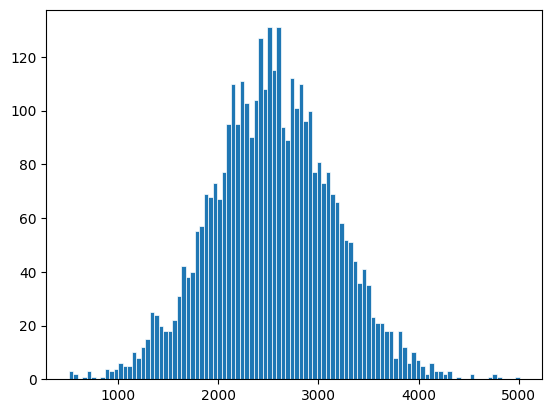

In [13]:
s = np.random.normal(mu, variance**(1/2), df_region[["consumption"]].count())  
df_simulate = pd.DataFrame(s, columns = ["consumption"])  #create data stimulated

fig, ax = plt.subplots()
print(df_simulate)
ax.hist(s, bins=100, linewidth=0.5, edgecolor="white")
plt.show()

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

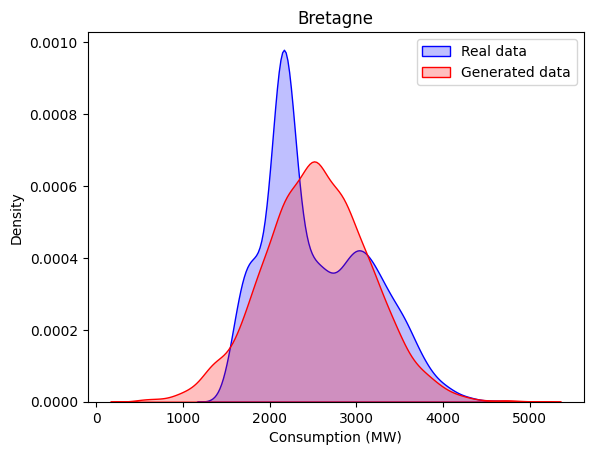

In [14]:
sns.kdeplot(data=df_region, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data= df_simulate, x ="consumption", label="Generated data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

On observe que l'hypothèse d'une gausienne n'est pas forcément adapté, on observe deux pics correspondant probablement à deux gausiennes différentes

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [15]:
# Allow us to select only winter days (by separating the year, month and day)
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3431790342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3431790342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3431790342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

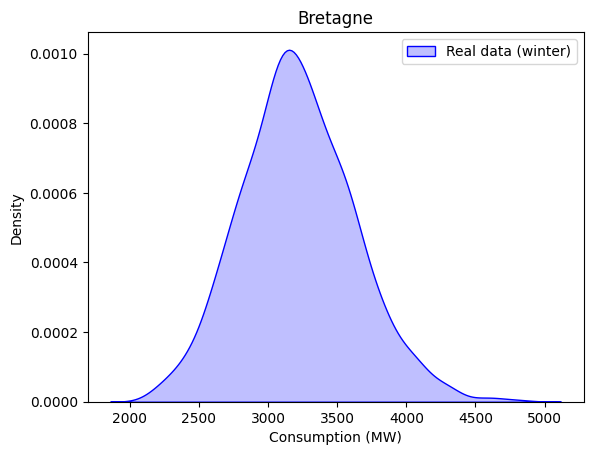

In [16]:
sns.kdeplot(data=df_hiver, x="consumption", label="Real data (winter)", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

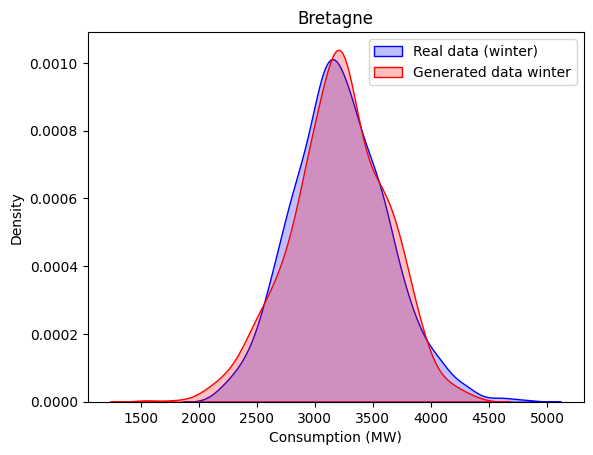

In [17]:
mu_hiver = df_hiver["consumption"].mean()  #compute the mean
sigma_hiver = df_hiver["consumption"].var()  #compute the variance 
s_hiver = np.random.normal(mu_hiver, sigma_hiver**(1/2), df_hiver[["consumption"]].count())
df_simulatehiver = pd.DataFrame(s_hiver, columns = ["consumption"])   #data generated for winter days

sns.kdeplot(data=df_hiver, x="consumption", label="Real data (winter)", color='blue', fill=True)
sns.kdeplot(data = df_simulatehiver, x = "consumption", label = "Generated data winter", color = 'red', fill =True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne est plus appropriée quand on prend en considération uniquement la période hivernale. La consommation n'est pas la même en hiver et en été.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Montrons tout d'abord que $d(f,g) \in [0,1]$, sachant que $f$ et $g$ sont deux fonctions de répartitions : 

On a $\forall x \in Supp(f) \cup Supp(g)$, $ |f(x) - g(x)| \geq 0 $, donc par positivité de l'intégrale, on a rapidement $d(f,g) \geq 0$

De plus, $f$ et $g$ sont deux fonctions de répartitions, donc 

$\forall x \in Supp(f) \cup Supp(g)$, $|f(x)| \leq 1$ & $|g(x)| \leq 1$

Ainsi, 

$\forall x \in Supp(f) \cup Supp(g)$, $|f(x) - g(x)| \leq 2$ par inégalité triangulaire

d'où $d(f,g) = \frac{1}{2} \int |f(x) - g(x)| \mathrm dx \leq \frac{1}{2} \int 2 \mathrm dx $ $\leq 1$


Pour $f$ et $g$ à supports disjoints, on a :

$d(f,g) = \frac{1}{2} \int_{Supp(f) \cup Supp(g)} |f(x) - g(x)| \mathrm dx $ = $\frac{1}{2}( \int_{Supp(f)} |f(x) - g(x)| \mathrm dx + \int_{Supp(g)} |f(x) - g(x)| \mathrm dx )$ 

$d(f,g) = \frac{1}{2}(\int_{Supp(f)} |f(x)| \mathrm dx + \int_{Supp(g)} | g(x)| \mathrm dx)$

Or par propriété, f et g sont deux fonctions de répartition donc : 

$\int_{Supp(f)} |f(x)| \mathrm dx = \int_{Supp(g)} | g(x)| \mathrm dx = 1$ 

d'où $d(f,g) =1$

Supposons que $d(f,g) = 0$, alors on a immédiatement $\int | f(x) - g(x) | dx = 0$. Cela implique que : 

$\forall x \in Supp(f) \cup Supp(g) | f(x) - g(x) | = 0 $ p.p  d'où $f(x) = g(x)$ p.p

Le sens réciproque est direct.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

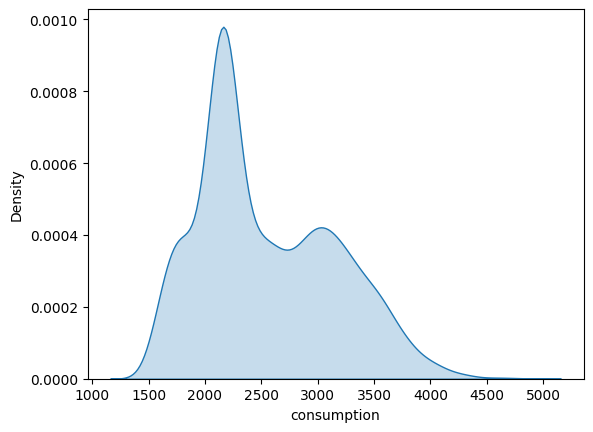

In [18]:
kde_real = sns.kdeplot(data=df_region, x="consumption", cumulative = False, fill = "True")

def dissimilarity(f, g):
    '''
    f,g : distribution fonctions
    return : value of dissimilarity
    '''
    return 0.5 * np.trapz(np.abs(f - g))



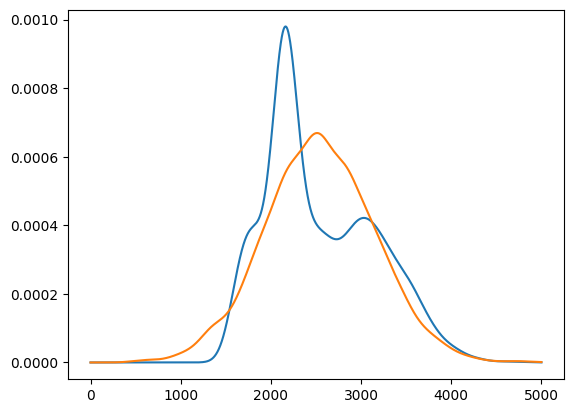

0.17636337956346215


In [19]:
test2 = gaussian_kde(df_simulate["consumption"])
test1 = gaussian_kde(df_region["consumption"])
x_values1 = np.linspace(0, 5000, 5000)
kde_y1 = test1.evaluate(x_values1)

x_values2 = np.linspace(0, 5000, 5000)
kde_y2 = test2.evaluate(x_values2)

plt.plot(x_values1, kde_y1)
plt.plot(x_values2,kde_y2)
plt.show()

dissimilarity_score = dissimilarity(kde_y1, kde_y2)
print(dissimilarity_score)
plt.show()

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

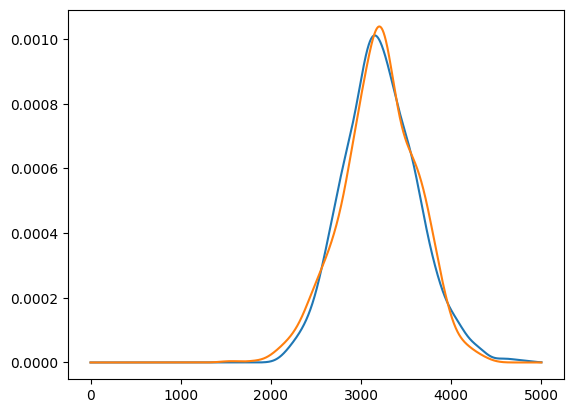

0.04948784955076948


In [20]:
test2 = gaussian_kde(df_simulatehiver["consumption"])
test1 = gaussian_kde(df_hiver["consumption"])
x_values1 = np.linspace(0, 5000, 5000)
kde_y1 = test1.evaluate(x_values1)

x_values2 = np.linspace(0, 5000, 5000)
kde_y2 = test2.evaluate(x_values2)

plt.plot(x_values1, kde_y1)
plt.plot(x_values2,kde_y2)
plt.show()

dissimilarity_score = dissimilarity(kde_y1, kde_y2)
print(dissimilarity_score)
plt.show()

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [21]:
L_mean = []
L_std = []
for region in regions:
    df_region = df[df.region == region]
    df_region['date'] = pd.to_datetime(df_region['date'])
    df_region['annee'] = df_region['date'].dt.year
    df_region['mois'] = df_region['date'].dt.month
    df_region['jour'] = df_region['date'].dt.day
    df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
    mu = df_region["consumption"].mean()
    print(mu)
    sigma = df_region["consumption"].var()**(1/2)
    L_mean.append(mu)
    L_std.append(sigma)
    
data = {
    'Region': regions,
    'Mean': L_mean,
    'Std': L_std,
}
df_data = pd.DataFrame(data)
df_data.head()
    

7495.463318432816
2416.4086247699183
2546.536155666579
2139.848014725217
5155.554036287142
5726.144359716013
3168.109650276098
4925.484091506705
4266.2587430975545
3077.410465422035
4656.43518275046
8008.680778332895


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3380178962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3380178962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3380178962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Region,Mean,Std
0,Auvergne-Rhône-Alpes,7495.463318,1453.963211
1,Bourgogne-Franche-Comté,2416.408625,502.919423
2,Bretagne,2546.536156,604.942984
3,Centre-Val de Loire,2139.848015,520.851404
4,Grand Est,5155.554036,945.233197


In [22]:
L_diss = [] 
x_values1 = np.linspace(0,5000,5000)
for region in regions:
    df_region = df[df.region == region]
    real_data = gaussian_kde(df_region["consumption"])
    
    mu = df_data[df_data['Region'] == 'Bretagne']['Mean'].values[0]
    sigma = df_data[df_data['Region'] == 'Bretagne']['Std'].values[0]
    dissimilarity_score = 0
    kde_y1 = real_data.evaluate(x_values1)
    for i in range(100): ##On fait la moyenne des dissimilarités (calculées 100 fois)
        s = np.random.normal(mu, sigma, df_region[["consumption"]].count())
        df_simulate = pd.DataFrame(s, columns = ["consumption"])
        generated_data = gaussian_kde(df_simulate["consumption"])
        kde_y2 = generated_data.evaluate(x_values1)
        dissimilarity_score = dissimilarity_score + dissimilarity(kde_y1, kde_y2)
    
    dissimilarity_score = dissimilarity_score / 100
    L_diss.append(dissimilarity_score)

data["Dissimilarity (all seasons)"] = L_diss

In [24]:
df_data = pd.DataFrame(data)
df_data

,Region,Mean,Std,Dissimilarity (all seasons)
0,Auvergne-Rhône-Alpes,7495.463318,1453.963211,0.502989
1,Bourgogne-Franche-Comté,2416.408625,502.919423,0.177909
2,Bretagne,2546.536156,604.942984,0.177038
3,Centre-Val de Loire,2139.848015,520.851404,0.334200
4,Grand Est,5155.554036,945.233197,0.672777
5,Hauts-de-France,5726.144360,1004.910121,0.613255
6,Normandie,3168.109650,675.635275,0.306883
7,Nouvelle-Aquitaine,4925.484092,1047.101059,0.710986
8,Occitanie,4266.258743,939.448276,0.661295
9,Pays de la Loire,3077.410465,722.792100,0.271316


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [25]:
L_mean_hiver = []
L_var_hiver = []
for region in regions:
    df_region = df[df.region == region]
    df_region['date'] = pd.to_datetime(df_region['date'])
    df_region['annee'] = df_region['date'].dt.year
    df_region['mois'] = df_region['date'].dt.month
    df_region['jour'] = df_region['date'].dt.day
    df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
    mu = df_hiver["consumption"].mean()
    print(mu)
    sigma = df_hiver["consumption"].var()**(1/2)
    L_mean_hiver.append(mu)
    L_var_hiver.append(sigma)
    
data["Mean (hiver)"] = L_mean_hiver
data["Std deviation (hiver)"] = L_var_hiver

df_data = pd.DataFrame(data)
df_data.head()

9066.37881873727
2918.8228105906314
3214.1782077393077
2715.12016293279
6051.250509164969
6754.994908350305
3896.706720977597
6077.567209775967
5307.730142566192
3833.2301425661913
5609.056008146639
9968.476578411406


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3988979084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3988979084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3988979084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Region,Mean,Std,Dissimilarity (all seasons),Mean (hiver),Std deviation (hiver)
0,Auvergne-Rhône-Alpes,7495.463318,1453.963211,0.502989,9066.378819,1061.506235
1,Bourgogne-Franche-Comté,2416.408625,502.919423,0.177909,2918.822811,374.700540
2,Bretagne,2546.536156,604.942984,0.177038,3214.178208,409.476374
3,Centre-Val de Loire,2139.848015,520.851404,0.334200,2715.120163,367.069151
4,Grand Est,5155.554036,945.233197,0.672777,6051.250509,731.183941


In [26]:
L_diss_hiver = []
x_values1 = np.linspace(0,5000,5000)
for region in regions:
    df_region = df[df.region == region]
    
    df_region['date'] = pd.to_datetime(df_region['date'])
    df_region['annee'] = df_region['date'].dt.year
    df_region['mois'] = df_region['date'].dt.month
    df_region['jour'] = df_region['date'].dt.day
    df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
    
    real_data = gaussian_kde(df_hiver["consumption"])
    mu = df_hiver["consumption"].mean()
    sigma = df_hiver["consumption"].var()**(1/2)
    dissimilarity_score = 0
    kde_y1 = real_data.evaluate(x_values1)
    for i in range(100): 
        s = np.random.normal(mu, sigma, df_hiver[["consumption"]].count())
        df_simulate = pd.DataFrame(s, columns = ["consumption"])
        generated_data = gaussian_kde(df_simulate["consumption"])
        kde_y2 = generated_data.evaluate(x_values1)
        dissimilarity_score = dissimilarity_score + dissimilarity(kde_y1, kde_y2)
    
    dissimilarity_score = dissimilarity_score / 100
    L_diss_hiver.append(dissimilarity_score)

data["Dissimilarity (hiver)"] = L_diss_hiver

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4031364889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4031364889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4031364889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [27]:
data["Dissimilarity (all seasons)"] = L_diss
data["Dissimilarity (hiver)"] = L_diss_hiver

df_data = pd.DataFrame(data)
df_data

,Region,Mean,Std,Dissimilarity (all seasons),Mean (hiver),Std deviation (hiver),Dissimilarity (hiver)
0,Auvergne-Rhône-Alpes,7495.463318,1453.963211,0.502989,9066.378819,1061.506235,0.000048
1,Bourgogne-Franche-Comté,2416.408625,502.919423,0.177909,2918.822811,374.700540,0.040589
2,Bretagne,2546.536156,604.942984,0.177038,3214.178208,409.476374,0.040119
3,Centre-Val de Loire,2139.848015,520.851404,0.334200,2715.120163,367.069151,0.046342
4,Grand Est,5155.554036,945.233197,0.672777,6051.250509,731.183941,0.005245
5,Hauts-de-France,5726.144360,1004.910121,0.613255,6754.994908,734.456394,0.001431
6,Normandie,3168.109650,675.635275,0.306883,3896.706721,470.490905,0.045869
7,Nouvelle-Aquitaine,4925.484092,1047.101059,0.710986,6077.567210,808.722556,0.009352
8,Occitanie,4266.258743,939.448276,0.661295,5307.730143,753.018801,0.030568
9,Pays de la Loire,3077.410465,722.792100,0.271316,3833.230143,541.248756,0.039261


Le meilleur fit est obtenu pour les régions suivantes : Auvergne-Rhône-Alpes, Île-de-France, Hauts-de-France

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

In [28]:
#Sauvegarde le dataframe obtenu sous format CSV
df_data.to_csv('dataframe.csv', index=False) 
df_data

,Region,Mean,Std,Dissimilarity (all seasons),Mean (hiver),Std deviation (hiver),Dissimilarity (hiver)
0,Auvergne-Rhône-Alpes,7495.463318,1453.963211,0.502989,9066.378819,1061.506235,0.000048
1,Bourgogne-Franche-Comté,2416.408625,502.919423,0.177909,2918.822811,374.700540,0.040589
2,Bretagne,2546.536156,604.942984,0.177038,3214.178208,409.476374,0.040119
3,Centre-Val de Loire,2139.848015,520.851404,0.334200,2715.120163,367.069151,0.046342
4,Grand Est,5155.554036,945.233197,0.672777,6051.250509,731.183941,0.005245
5,Hauts-de-France,5726.144360,1004.910121,0.613255,6754.994908,734.456394,0.001431
6,Normandie,3168.109650,675.635275,0.306883,3896.706721,470.490905,0.045869
7,Nouvelle-Aquitaine,4925.484092,1047.101059,0.710986,6077.567210,808.722556,0.009352
8,Occitanie,4266.258743,939.448276,0.661295,5307.730143,753.018801,0.030568
9,Pays de la Loire,3077.410465,722.792100,0.271316,3833.230143,541.248756,0.039261


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/968780213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/968780213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/968780213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

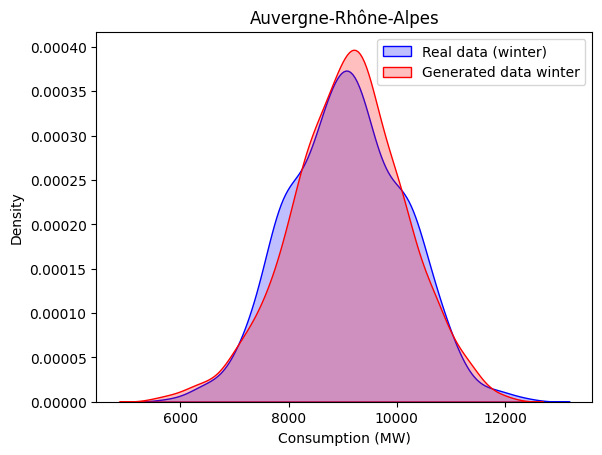

In [29]:
region = "Auvergne-Rhône-Alpes"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]

mu_hiver = df_data[df_data["Region"] == region]["Mean (hiver)"]
sigma_hiver = df_data[df_data["Region"] == region]["Std deviation (hiver)"]
s_hiver = np.random.normal(mu_hiver, sigma_hiver, df_hiver[["consumption"]].count())
df_simulatehiver = pd.DataFrame(s_hiver, columns = ["consumption"])
df_simulatehiver.head()

sns.kdeplot(data=df_hiver, x="consumption", label="Real data (winter)", color='blue', fill=True)
sns.kdeplot(data = df_simulatehiver, x = "consumption", label = "Generated data winter", color = 'red', fill =True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4036724413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4036724413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/4036724413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

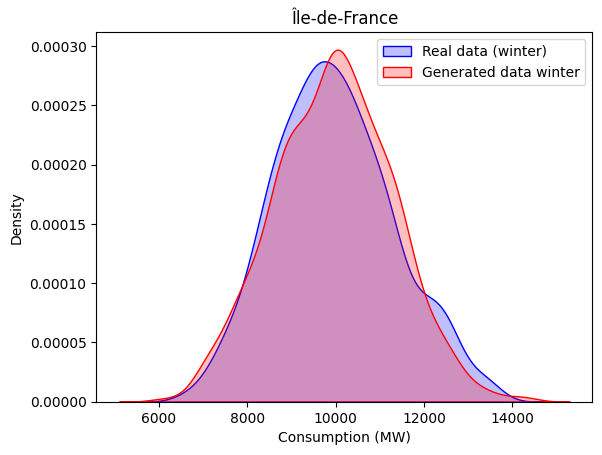

In [30]:
region = "Île-de-France"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]

mu_hiver = df_data[df_data["Region"] == region]["Mean (hiver)"]
sigma_hiver = df_data[df_data["Region"] == region]["Std deviation (hiver)"]
s_hiver = np.random.normal(mu_hiver, sigma_hiver, df_hiver[["consumption"]].count())
df_simulatehiver = pd.DataFrame(s_hiver, columns = ["consumption"])
df_simulatehiver.head()

sns.kdeplot(data=df_hiver, x="consumption", label="Real data (winter)", color='blue', fill=True)
sns.kdeplot(data = df_simulatehiver, x = "consumption", label = "Generated data winter", color = 'red', fill =True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/2519817366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/2519817366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/2519817366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

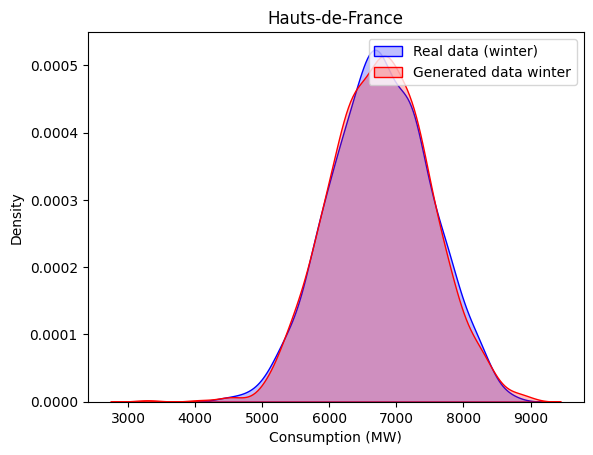

In [31]:
region = "Hauts-de-France"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]

mu_hiver = df_data[df_data["Region"] == region]["Mean (hiver)"]
sigma_hiver = df_data[df_data["Region"] == region]["Std deviation (hiver)"]
s_hiver = np.random.normal(mu_hiver, sigma_hiver, df_hiver[["consumption"]].count())
df_simulatehiver = pd.DataFrame(s_hiver, columns = ["consumption"])
df_simulatehiver.head()

sns.kdeplot(data=df_hiver, x="consumption", label="Real data (winter)", color='blue', fill=True)
sns.kdeplot(data = df_simulatehiver, x = "consumption", label = "Generated data winter", color = 'red', fill =True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma$=400MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0$ = 3500MW et l'écart-type $\sigma_0$=500MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :
Si on cherche la loi $\theta$ avec une variable aléatoire $X$
On a, pour une observation :

$\pi(\theta | X = x) = \frac{\pi(\theta) p_\theta(x)}{m_X(x)} \propto \exp(- \frac{(\theta - \mu_0)^2}{2 \sigma_0^2}) \exp(- \frac{(\theta - x)^2}{2\sigma^2}) \propto \exp( - \frac{1}{2} \frac{\sigma_0^2 +\sigma^2}{\sigma_0^2 \sigma^2}(\theta^2 - 2 \frac{\mu_0 \sigma^2 + x \sigma_0^2}{\sigma_0^2 + \sigma^2}\theta )) $

Par proportionnalité, on obtient : 

$ \theta | x \sim \mathcal{N}(\frac{\mu_0 \sigma^2 + x \sigma_0^2}{\sigma_0^2 + \sigma^2}, \frac{\sigma_0^2 \sigma^2}{\sigma_0^2 +\sigma^2}) $

Pour n observations, on reconnaît une gaussienne également avec : 

$ \theta | y \sim \mathcal{N}(\frac{\mu_0 \sigma^2 + \sigma_0^2\sum_{i} x_i}{n\sigma_0^2 + \sigma^2}, \frac{\sigma_0^2 \sigma^2}{n\sigma_0^2 +\sigma^2}) $

Cela donne les paramètres de la moyenne et de la variance de la loi à posteriori

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

### DANS TOUT LE TP, ON VA CONSIDÉRER HIVER DE L'ANNÉE X COMME ÉTANT JANVIER-FÉVRIER-MARS DE L'ANNÉE X ET DÉCEMBRE DE L'ANNÉE X

In [32]:
region = "Bretagne"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
df_hiver

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1219997522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1219997522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1219997522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,region,date,consumption,annee,mois,jour
7606,Bretagne,2013-01-01,2595,2013,1,1
7607,Bretagne,2013-01-02,3195,2013,1,2
7608,Bretagne,2013-01-03,3157,2013,1,3
7609,Bretagne,2013-01-04,3142,2013,1,4
7610,Bretagne,2013-01-05,2859,2013,1,5
...,...,...,...,...,...,...
11333,Bretagne,2023-03-17,2609,2023,3,17
11334,Bretagne,2023-03-18,2309,2023,3,18
11335,Bretagne,2023-03-19,2206,2023,3,19
11336,Bretagne,2023-03-20,2672,2023,3,20


In [33]:
def param_mu(sum,n):
    result = (3500*400*400+500*500*sum)/(n*500*500+400*400)
    return result

def param_var(n):
    result = (500*500*400*400)/(n*500*500+400*400)
    return result

param_loi = { 
    'annee': None,
    'mean': None,
    'variance': None,
}
L_annee = []
L_mean = []
L_var = []
for i in range (2013,2024):
    L_annee.append(i)
    condition = df_hiver['annee'] == i
    count = condition.sum()
    sum = df_hiver["consumption"].where(condition).sum()
    
    mu = param_mu(sum,count)
    var = param_var(count)
    
    L_mean.append(mu)
    L_var.append(var)
   
param_loi["annee"] = L_annee
param_loi['mean'] = L_mean
param_loi["variance"] = L_var


In [34]:
df_param_loi = pd.DataFrame(param_loi)
df_param_loi

,annee,mean,variance
0,2013,3343.413504,1765.225066
1,2014,3118.424537,1765.225066
2,2015,3167.398500,1765.225066
3,2016,3207.507639,1745.962462
4,2017,3251.224625,1765.225066
5,2018,3315.081642,1765.225066
6,2019,3195.200794,1765.225066
7,2020,3145.504147,1745.962462
8,2021,3341.946161,1765.225066
9,2022,3165.081642,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

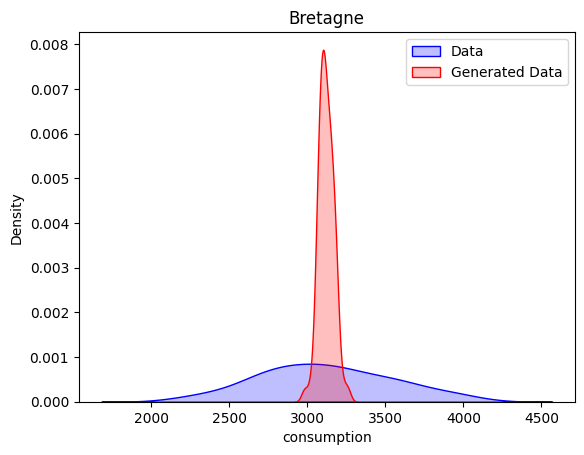

In [35]:
sns.kdeplot(data=df_hiver[df_hiver["annee"] == 2023], x="consumption", label="Data", color='blue', fill=True)
condition = df_hiver['annee'] == 2023
count = condition.sum()
s = np.random.normal(df_param_loi[df_param_loi["annee"] == 2023]["mean"].values[0], df_param_loi[df_param_loi["annee"] == 2023]["variance"].values[0]**(1/2), count)
df_simulate_loi = pd.DataFrame(s, columns = ["consumption"])

sns.kdeplot(data=df_simulate_loi, x="consumption", label="Generated Data", color='red', fill=True)
plt.title('Bretagne')
plt.legend()
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

La variance est très élevée pour les données générées. En effet, on se base sur un échantillon plutôt faible de consommation en 2023 (seulement 10% du nombre d'échantillons). Les résultats sont meilleurs dans la partie A

## D. Test d'hypothèse

### DANS TOUT LE TP, ON VA CONSIDÉRER HIVER DE L'ANNÉE X COMME ÉTANT JANVIER-FÉVRIER-MARS DE L'ANNÉE X ET DÉCEMBRE DE L'ANNÉE X

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :
En supposant $\mu_0 = 3200$
Supposons l'hypothèse $H_0: \sigma_0 = 500$ et $H_1: \sigma_1 = 400$. On effectue le test de rapport de vraisemblance de Neyman-Pearson

On sait que la loi normale est dans la famille des lois exponentielles, donc pour les n variables aléatoires : 

$f(x,\sigma) = \frac{1}{(2\pi)^{1/2}}\exp(-\frac{1}{2}\frac{\sum_{k=1}^{n}(x_k - \mu_0)^2}{\sigma^2})$


En notant $T(x) = \sum_{k=1}^{n}(x_k - \mu_0)^2$, et en plus de savoir que $ \sigma_1 \leq \sigma_0$

Cela donne une région de rejet telle que : 
$T(x) \leq k_{\alpha}$

$\mathbb{P}[T(x) \leq k_{\alpha} | \sigma = \sigma_0] = 1 - \alpha$

$\mathbb{P}[T'(x) \leq \frac{k_{\alpha}}{\sigma_0^2}] = 1 - \alpha$ avec $T'$ qui suit une loi $\chi^2$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [36]:
region = "Bretagne"
df_region = df[df.region == region]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ] ##SELECTIONNE LES JOURS D'HIVERS
df_hiver = df_hiver[df_hiver.annee == 2023] #####NE PREND QUE 2023 

df_hiver

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/662147100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/662147100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/662147100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,region,date,consumption,annee,mois,jour
11258,Bretagne,2023-01-01,2306,2023,1,1
11259,Bretagne,2023-01-02,2702,2023,1,2
11260,Bretagne,2023-01-03,3049,2023,1,3
11261,Bretagne,2023-01-04,2904,2023,1,4
11262,Bretagne,2023-01-05,2833,2023,1,5
...,...,...,...,...,...,...
11333,Bretagne,2023-03-17,2609,2023,3,17
11334,Bretagne,2023-03-18,2309,2023,3,18
11335,Bretagne,2023-03-19,2206,2023,3,19
11336,Bretagne,2023-03-20,2672,2023,3,20


NOTE : 

On a pris ici l'année 2023 correspondant au mois de janvier, février et mars. (sans prendre en compte les valeurs de fin 2022)

In [37]:
mean = 3200  
H0 = 500**2
data = df_hiver["consumption"]

n = len(data) ###nombre de ddl de chi2 + 1  

T = np.sum((data-3200)**2)/H0

alpha = 0.01  # Niveau de signification

quantile = chi2.ppf(1-alpha, n-1)



print(T)
print(quantile)
# Test d'hypothèse
if T < quantile:
    print("Rejeter l'hypothèse nulle H0")
else:
    print("Ne pas rejeter l'hypothèse nulle H0")


58.400252
111.14401942288376
Rejeter l'hypothèse nulle H0


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

In [38]:
df_region = df[(df.region == "Bretagne") | (df.region == "Provence-Alpes-Côte d'Azur")]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver_bre = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
df_hiver_bre

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1436395348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1436395348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/1436395348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,region,date,consumption,annee,mois,jour
7606,Bretagne,2013-01-01,2595,2013,1,1
7607,Bretagne,2013-01-02,3195,2013,1,2
7608,Bretagne,2013-01-03,3157,2013,1,3
7609,Bretagne,2013-01-04,3142,2013,1,4
7610,Bretagne,2013-01-05,2859,2013,1,5
...,...,...,...,...,...,...
41757,Provence-Alpes-Côte d'Azur,2023-03-17,4442,2023,3,17
41758,Provence-Alpes-Côte d'Azur,2023-03-18,4258,2023,3,18
41759,Provence-Alpes-Côte d'Azur,2023-03-19,4116,2023,3,19
41760,Provence-Alpes-Côte d'Azur,2023-03-20,4257,2023,3,20


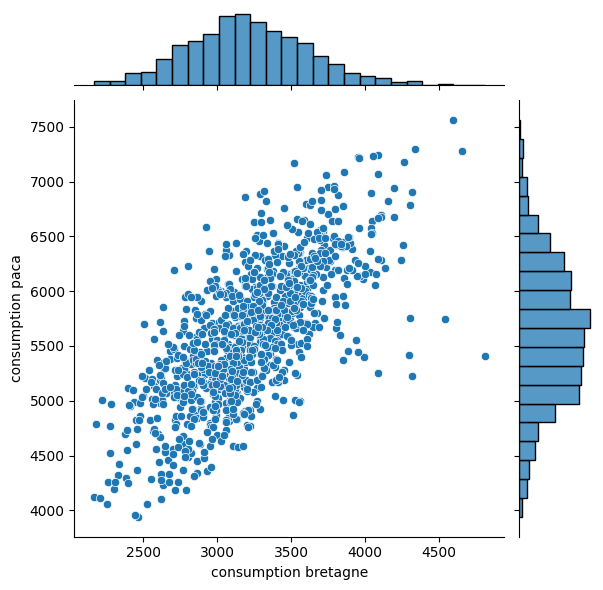

In [40]:
Liste_bret = df_hiver_bre["consumption"].where(df_hiver_bre["region"] == "Bretagne").dropna().tolist()
Liste_paca = df_hiver_bre["consumption"].where(df_hiver_bre["region"] == "Provence-Alpes-Côte d'Azur").dropna().tolist()
df_hiver_joint = pd.DataFrame(columns=['consumption bretagne', 'consumption paca'])
df_hiver_joint["consumption bretagne"] = Liste_bret
df_hiver_joint["consumption paca"] = Liste_paca
df_hiver_joint
sns.jointplot(data=df_hiver_joint,x = "consumption bretagne", y = "consumption paca" )
plt.plot()
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

On peut penser que la consommation de ces deux régions est indépendantes avec deux "gaussiennes" différentes séparées : on aura cependant une zone de recouvrement

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

In [65]:
L_countbret = []
L_countpaca = []

######## CREATE THE MATRIX FOR THE CHI2 TEST (SEPARATE VALUES BY CONSUMPTION WITH STEP 1000)
for i in range(2,8):
    count = df_hiver_joint[(df_hiver_joint["consumption bretagne"] > 1000*i) & (df_hiver_joint["consumption bretagne"] < 1000*(i+1))].count()
    L_countbret.append(count.values[0])
    count = df_hiver_joint[(df_hiver_joint["consumption paca"] > 1000*i) & (df_hiver_joint["consumption paca"] < 1000*(i+1))].count()
    L_countpaca.append(count.values[0])

print(L_countbret)
print(L_countpaca)
matrice = np.array([L_countpaca, L_countbret])

# Somme des lignes (total des lignes)
row_totals = np.sum(matrice, axis=1)

# Somme des colonnes (total des colonnes)
col_totals = np.sum(matrice, axis=0)


total = np.sum(row_totals)

expected = []
for i in range(len(row_totals)):
    expected_row = []
    for j in range(len(col_totals)):
        expected_value = (row_totals[i] * col_totals[j]) / total
        expected_row.append(expected_value)
    expected.append(expected_row)

chi22 = 0
for i in range(len(row_totals)):
    for j in range(len(col_totals)):
        chi22 += ((matrice[i][j] - expected[i][j]) ** 2) / expected[i][j]    

degrees_of_freedom = (len(row_totals)-1)*(len(col_totals)-1)



# Calcul de la probabilité (p-value)
p_value = chi2.ppf(0.99, degrees_of_freedom)


if chi22 > p_value: 
    print("Hypothèse nulle rejetée car", chi22, ">", p_value)
else:
    print("Hypothèse nulle validée car", chi22, "<=", p_value)

[293, 653, 36, 0, 0, 0]
[0, 2, 153, 558, 256, 12]
Hypothèse nulle rejetée car 1838.4529665878924 > 15.08627246938899


Votre réponse :

4. Donnez le résultat de ce test pour $\alpha=1\%$.

cf.résultat dans le code d'avant

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [66]:
df_region = df[(df.region == "Bretagne")]
df_region['date'] = pd.to_datetime(df_region['date'])
df_region['annee'] = df_region['date'].dt.year
df_region['mois'] = df_region['date'].dt.month
df_region['jour'] = df_region['date'].dt.day
df_hiver_bre = df_region[(  (df_region['mois'] >= 12) & (df_region['jour'] >= 22)  )  | (df_region['mois'] <= 2) | ( (df_region['mois'] ==3)  & (df_region['jour'] < 22) ) ]
df_hiver_bre

/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3013278724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date'] = pd.to_datetime(df_region['date'])
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3013278724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['annee'] = df_region['date'].dt.year
/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_54450/3013278724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,region,date,consumption,annee,mois,jour
7606,Bretagne,2013-01-01,2595,2013,1,1
7607,Bretagne,2013-01-02,3195,2013,1,2
7608,Bretagne,2013-01-03,3157,2013,1,3
7609,Bretagne,2013-01-04,3142,2013,1,4
7610,Bretagne,2013-01-05,2859,2013,1,5
...,...,...,...,...,...,...
11333,Bretagne,2023-03-17,2609,2023,3,17
11334,Bretagne,2023-03-18,2309,2023,3,18
11335,Bretagne,2023-03-19,2206,2023,3,19
11336,Bretagne,2023-03-20,2672,2023,3,20


In [74]:
mean = df_hiver_bre['consumption'].mean()
std_dev = df_hiver_bre['consumption'].var()**(1/2)

print(mean)
confidence_level = 0.95
n = df_hiver_bre["consumption"].count()

standard_error = std_dev / np.sqrt(n)

z_critical = t.ppf(1-0.05/2,n)
lower_bound = mean - z_critical * standard_error
upper_bound = mean + z_critical * standard_error

print("Intervalle de confiance à 95% de la moyenne :", (lower_bound, upper_bound))

3114.4875
Intervalle de confiance à 95% de la moyenne : (3020.7731614170443, 3208.201838582956)


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [70]:
df_hiver_bre = df_hiver_bre[(df_hiver_bre.annee == 2023)]

mean = df_hiver_bre['consumption'].mean()
std_dev = df_hiver_bre['consumption'].var()**(1/2)
n = df_hiver_bre["consumption"].count()
mu0 = 3100
test = t.ppf(0.95, n)

z_statistic = (mean - mu0) / (std_dev / (n ** 0.5))

 #pour une infinité de degré de liberté, valeur du quantile à 95%

if z_statistic > test:
    print("Hypothèse nulle rejetée car {} est supérieur à {}".format(z_statistic, quantile))
else:
    print("Hypothèse nulle acceptée car {} est inférieur à {}".format(z_statistic, quantile))

Hypothèse nulle acceptée car 0.30764815980243937 est inférieur à 1.6455146786450539
